<a href="https://colab.research.google.com/github/claudeshyaka/ml-final-project/blob/main/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Approach

In [ ]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim

seed = 42
torch.set_printoptions(edgeitems=2, linewidth=75)
torch.manual_seed(seed)

In [ ]:
# Load energy data
df_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/power_dataset.csv", delimiter=",", \
                          index_col="time")
df_dataset.head()

Average temperature in K  Average pressure in hPa  \
time                                                                           
2015-01-01 00:00:00+01:00                272.491463                   1016.4   
2015-01-01 01:00:00+01:00                272.512700                   1016.2   
2015-01-01 02:00:00+01:00                272.099137                   1016.8   
2015-01-01 03:00:00+01:00                272.089469                   1016.6   
2015-01-01 04:00:00+01:00                272.145900                   1016.6   

                           Average humidity in %  \
time                                               
2015-01-01 00:00:00+01:00                   82.4   
2015-01-01 01:00:00+01:00                   82.4   
2015-01-01 02:00:00+01:00                   82.0   
2015-01-01 03:00:00+01:00                   82.0   
2015-01-01 04:00:00+01:00                   82.0   

                           Average rain in last 1 hour in mm  \
time                                                           
2015-01-01 00:00:00+01:00                               82.4   
2015-01-01 01:00:00+01:00                               82.4   
2015-01-01 02:00:00+01:00                               82.0   
2015-01-01 03:00:00+01:00                               82.0   
2015-01-01 04:00:00+01:00                               82.0   

                           Average rain in last 3 hours in mm  \
time                                                            
2015-01-01 00:00:00+01:00                                82.4   
2015-01-01 01:00:00+01:00                                82.4   
2015-01-01 02:00:00+01:00                                82.0   
2015-01-01 03:00:00+01:00                                82.0   
2015-01-01 04:00:00+01:00                                82.0   

                           Average snow in last 3 hours in mm  \
time                                                            
2015-01-01 00:00:00+01:00                                82.4   
2015-01-01 01:00:00+01:00                                82.4   
2015-01-01 02:00:00+01:00                                82.0   
2015-01-01 03:00:00+01:00                                82.0   
2015-01-01 04:00:00+01:00                                82.0   

                           total load actual  
time                                          
2015-01-01 00:00:00+01:00            25385.0  
2015-01-01 01:00:00+01:00            24382.0  
2015-01-01 02:00:00+01:00            22734.0  
2015-01-01 03:00:00+01:00            21286.0  
2015-01-01 04:00:00+01:00            20264.0

In [ ]:
# Generate random indices for training and validation data.
n_samples = df_dataset.shape[0]
n_val = int(0.2 * n_samples)

# Split training and validation sets (Train set is 80% and Val set is 20%)
df_train_data = df_dataset.iloc[:-n_val]
df_val_data = df_dataset.iloc[-n_val:]
print("Number of training samples:", df_train_data.shape)
print("Number of validation samples:", df_val_data.shape)

Number of training samples: (30855, 7)
Number of validation samples: (7713, 7)


In [ ]:
df_train_data.head()

Average temperature in K  Average pressure in hPa  \
time                                                                           
2015-01-01 00:00:00+01:00                272.491463                   1016.4   
2015-01-01 01:00:00+01:00                272.512700                   1016.2   
2015-01-01 02:00:00+01:00                272.099137                   1016.8   
2015-01-01 03:00:00+01:00                272.089469                   1016.6   
2015-01-01 04:00:00+01:00                272.145900                   1016.6   

                           Average humidity in %  \
time                                               
2015-01-01 00:00:00+01:00                   82.4   
2015-01-01 01:00:00+01:00                   82.4   
2015-01-01 02:00:00+01:00                   82.0   
2015-01-01 03:00:00+01:00                   82.0   
2015-01-01 04:00:00+01:00                   82.0   

                           Average rain in last 1 hour in mm  \
time                                                           
2015-01-01 00:00:00+01:00                               82.4   
2015-01-01 01:00:00+01:00                               82.4   
2015-01-01 02:00:00+01:00                               82.0   
2015-01-01 03:00:00+01:00                               82.0   
2015-01-01 04:00:00+01:00                               82.0   

                           Average rain in last 3 hours in mm  \
time                                                            
2015-01-01 00:00:00+01:00                                82.4   
2015-01-01 01:00:00+01:00                                82.4   
2015-01-01 02:00:00+01:00                                82.0   
2015-01-01 03:00:00+01:00                                82.0   
2015-01-01 04:00:00+01:00                                82.0   

                           Average snow in last 3 hours in mm  \
time                                                            
2015-01-01 00:00:00+01:00                                82.4   
2015-01-01 01:00:00+01:00                                82.4   
2015-01-01 02:00:00+01:00                                82.0   
2015-01-01 03:00:00+01:00                                82.0   
2015-01-01 04:00:00+01:00                                82.0   

                           total load actual  
time                                          
2015-01-01 00:00:00+01:00            25385.0  
2015-01-01 01:00:00+01:00            24382.0  
2015-01-01 02:00:00+01:00            22734.0  
2015-01-01 03:00:00+01:00            21286.0  
2015-01-01 04:00:00+01:00            20264.0

In [ ]:
# Normalize the train and val subsets
target_mean = df_train_data["total load actual"].mean()
target_std = df_train_data["total load actual"].std()
for c in df_train_data.columns:
  mean = df_train_data[c].mean()
  std = df_train_data[c].std()
  df_train_data[[str(c)]] = (df_train_data[[str(c)]] - mean) / std
  df_val_data[[str(c)]] = (df_val_data[[str(c)]] - mean) / std

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
df_train_data.head()

Average temperature in K  Average pressure in hPa  \
time                                                                           
2015-01-01 00:00:00+01:00                 -2.279205                -0.021266   
2015-01-01 01:00:00+01:00                 -2.276282                -0.021336   
2015-01-01 02:00:00+01:00                 -2.333205                -0.021127   
2015-01-01 03:00:00+01:00                 -2.334536                -0.021197   
2015-01-01 04:00:00+01:00                 -2.326769                -0.021197   

                           Average humidity in %  \
time                                               
2015-01-01 00:00:00+01:00               0.911556   
2015-01-01 01:00:00+01:00               0.911556   
2015-01-01 02:00:00+01:00               0.884494   
2015-01-01 03:00:00+01:00               0.884494   
2015-01-01 04:00:00+01:00               0.884494   

                           Average rain in last 1 hour in mm  \
time                                                           
2015-01-01 00:00:00+01:00                           0.911556   
2015-01-01 01:00:00+01:00                           0.911556   
2015-01-01 02:00:00+01:00                           0.884494   
2015-01-01 03:00:00+01:00                           0.884494   
2015-01-01 04:00:00+01:00                           0.884494   

                           Average rain in last 3 hours in mm  \
time                                                            
2015-01-01 00:00:00+01:00                            0.911556   
2015-01-01 01:00:00+01:00                            0.911556   
2015-01-01 02:00:00+01:00                            0.884494   
2015-01-01 03:00:00+01:00                            0.884494   
2015-01-01 04:00:00+01:00                            0.884494   

                           Average snow in last 3 hours in mm  \
time                                                            
2015-01-01 00:00:00+01:00                            0.911556   
2015-01-01 01:00:00+01:00                            0.911556   
2015-01-01 02:00:00+01:00                            0.884494   
2015-01-01 03:00:00+01:00                            0.884494   
2015-01-01 04:00:00+01:00                            0.884494   

                           total load actual  
time                                          
2015-01-01 00:00:00+01:00          -0.722094  
2015-01-01 01:00:00+01:00          -0.939529  
2015-01-01 02:00:00+01:00          -1.296789  
2015-01-01 03:00:00+01:00          -1.610692  
2015-01-01 04:00:00+01:00          -1.832246

In [ ]:
df_val_data.head()

Average temperature in K  Average pressure in hPa  \
time                                                                           
2018-03-20 16:00:00+01:00                 -0.842426                -0.021893   
2018-03-20 17:00:00+01:00                 -0.685514                -0.021754   
2018-03-20 18:00:00+01:00                 -0.744975                -0.021684   
2018-03-20 19:00:00+01:00                 -0.818201                -0.021406   
2018-03-20 20:00:00+01:00                 -0.996860                -0.020918   

                           Average humidity in %  \
time                                               
2018-03-20 16:00:00+01:00              -1.036923   
2018-03-20 17:00:00+01:00              -1.686416   
2018-03-20 18:00:00+01:00              -1.551105   
2018-03-20 19:00:00+01:00              -1.266952   
2018-03-20 20:00:00+01:00              -1.510511   

                           Average rain in last 1 hour in mm  \
time                                                           
2018-03-20 16:00:00+01:00                          -1.036923   
2018-03-20 17:00:00+01:00                          -1.686416   
2018-03-20 18:00:00+01:00                          -1.551105   
2018-03-20 19:00:00+01:00                          -1.266952   
2018-03-20 20:00:00+01:00                          -1.510511   

                           Average rain in last 3 hours in mm  \
time                                                            
2018-03-20 16:00:00+01:00                           -1.036923   
2018-03-20 17:00:00+01:00                           -1.686416   
2018-03-20 18:00:00+01:00                           -1.551105   
2018-03-20 19:00:00+01:00                           -1.266952   
2018-03-20 20:00:00+01:00                           -1.510511   

                           Average snow in last 3 hours in mm  \
time                                                            
2018-03-20 16:00:00+01:00                           -1.036923   
2018-03-20 17:00:00+01:00                           -1.686416   
2018-03-20 18:00:00+01:00                           -1.551105   
2018-03-20 19:00:00+01:00                           -1.266952   
2018-03-20 20:00:00+01:00                           -1.510511   

                           total load actual  
time                                          
2018-03-20 16:00:00+01:00           1.370956  
2018-03-20 17:00:00+01:00           1.297250  
2018-03-20 18:00:00+01:00           1.261480  
2018-03-20 19:00:00+01:00           1.721930  
2018-03-20 20:00:00+01:00           2.137288

In [ ]:
# Transform data to a tensors
t_train_data = torch.tensor(df_train_data.values, dtype=torch.float32)
t_val_data = torch.tensor(df_val_data.values, dtype=torch.float32)

# Filter features and targets for training and validation.
t_un_train = t_train_data[:, :-1]
t_cn_train = t_train_data[:, -1].unsqueeze(1)

t_un_val = t_val_data[:, :-1]
t_cn_val = t_val_data[:, -1].unsqueeze(1)
t_un_train.shape, t_cn_train.shape, t_un_val.shape, t_cn_val.shape

(torch.Size([30855, 6]),
 torch.Size([30855, 1]),
 torch.Size([7713, 6]),
 torch.Size([7713, 1]))

In [ ]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear_1', nn.Linear(6, 60)),
    ('hidden_activation_1', nn.Tanh()),
    ('hidden_linear_2', nn.Linear(60, 200)),
    ('hidden_activation_2', nn.Tanh()),
    ('output_linear_3', nn.Linear(200, 20)),
    ('hidden_activation_3', nn.Tanh()),
    ('output_linear', nn.Linear(20, 1))
]))

In [ ]:
import time

loss_train_list = []
loss_val_list = []
epochs_list = []

def training_loop(
    n_epochs, optimizer, model, loss_fn, 
    t_u_train, t_u_val, t_c_train, t_c_val
    ):
    
    duration = []
    training_start_time = time.time()

    for epoch in range(1, n_epochs+1):
        
        t0 = time.time()

        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)

        with torch.no_grad():
            t_p_val = model(t_u_val)
            loss_val = loss_fn(t_p_val, t_c_val)
            assert loss_val.requires_grad == False

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        duration.append(time.time() - t0)

        if epoch == 1 or epoch % 50 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}, Time(s) {np.mean(duration):.5f}")
            loss_train_list.append(loss_train.item())
            loss_val_list.append(loss_val.item())
            epochs_list.append(epoch)
    print(f'Training finished, took {time.time() - training_start_time:.5f} seconds')

# Computing the Model Size
def compute_model_size(model):
    param_size = 0
    for param in model.parameters():
        param_size += param.nelement() * param.element_size()
    buffer_size = 0
    for buffer in model.buffers():
        buffer_size += buffer.nelement() * buffer.element_size()

    size_all_mb = (param_size + buffer_size) / 1024**2
    print('model size: {:.4f}MB'.format(size_all_mb))

In [ ]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

# Training loop
training_loop(
    n_epochs = 500, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_cn_train,
    t_c_val = t_cn_val)
    
# Computing the Model Size
compute_model_size(seq_model)

Epoch 1, Training loss 1.0309, Validation loss 1.0109, Time(s) 0.51390
Epoch 50, Training loss 0.9604, Validation loss 0.9192, Time(s) 0.27506
Epoch 100, Training loss 0.9279, Validation loss 0.8727, Time(s) 0.26293
Epoch 150, Training loss 0.9130, Validation loss 0.8488, Time(s) 0.23334
Epoch 200, Training loss 0.9060, Validation loss 0.8361, Time(s) 0.21825
Epoch 250, Training loss 0.9025, Validation loss 0.8289, Time(s) 0.21070
Epoch 300, Training loss 0.9006, Validation loss 0.8246, Time(s) 0.20477
Epoch 350, Training loss 0.8993, Validation loss 0.8219, Time(s) 0.19973
Epoch 400, Training loss 0.8984, Validation loss 0.8200, Time(s) 0.19596
Epoch 450, Training loss 0.8976, Validation loss 0.8186, Time(s) 0.19303
Epoch 500, Training loss 0.8969, Validation loss 0.8176, Time(s) 0.19076
Training finished, took 95.39573 seconds
model size: 0.0636MB


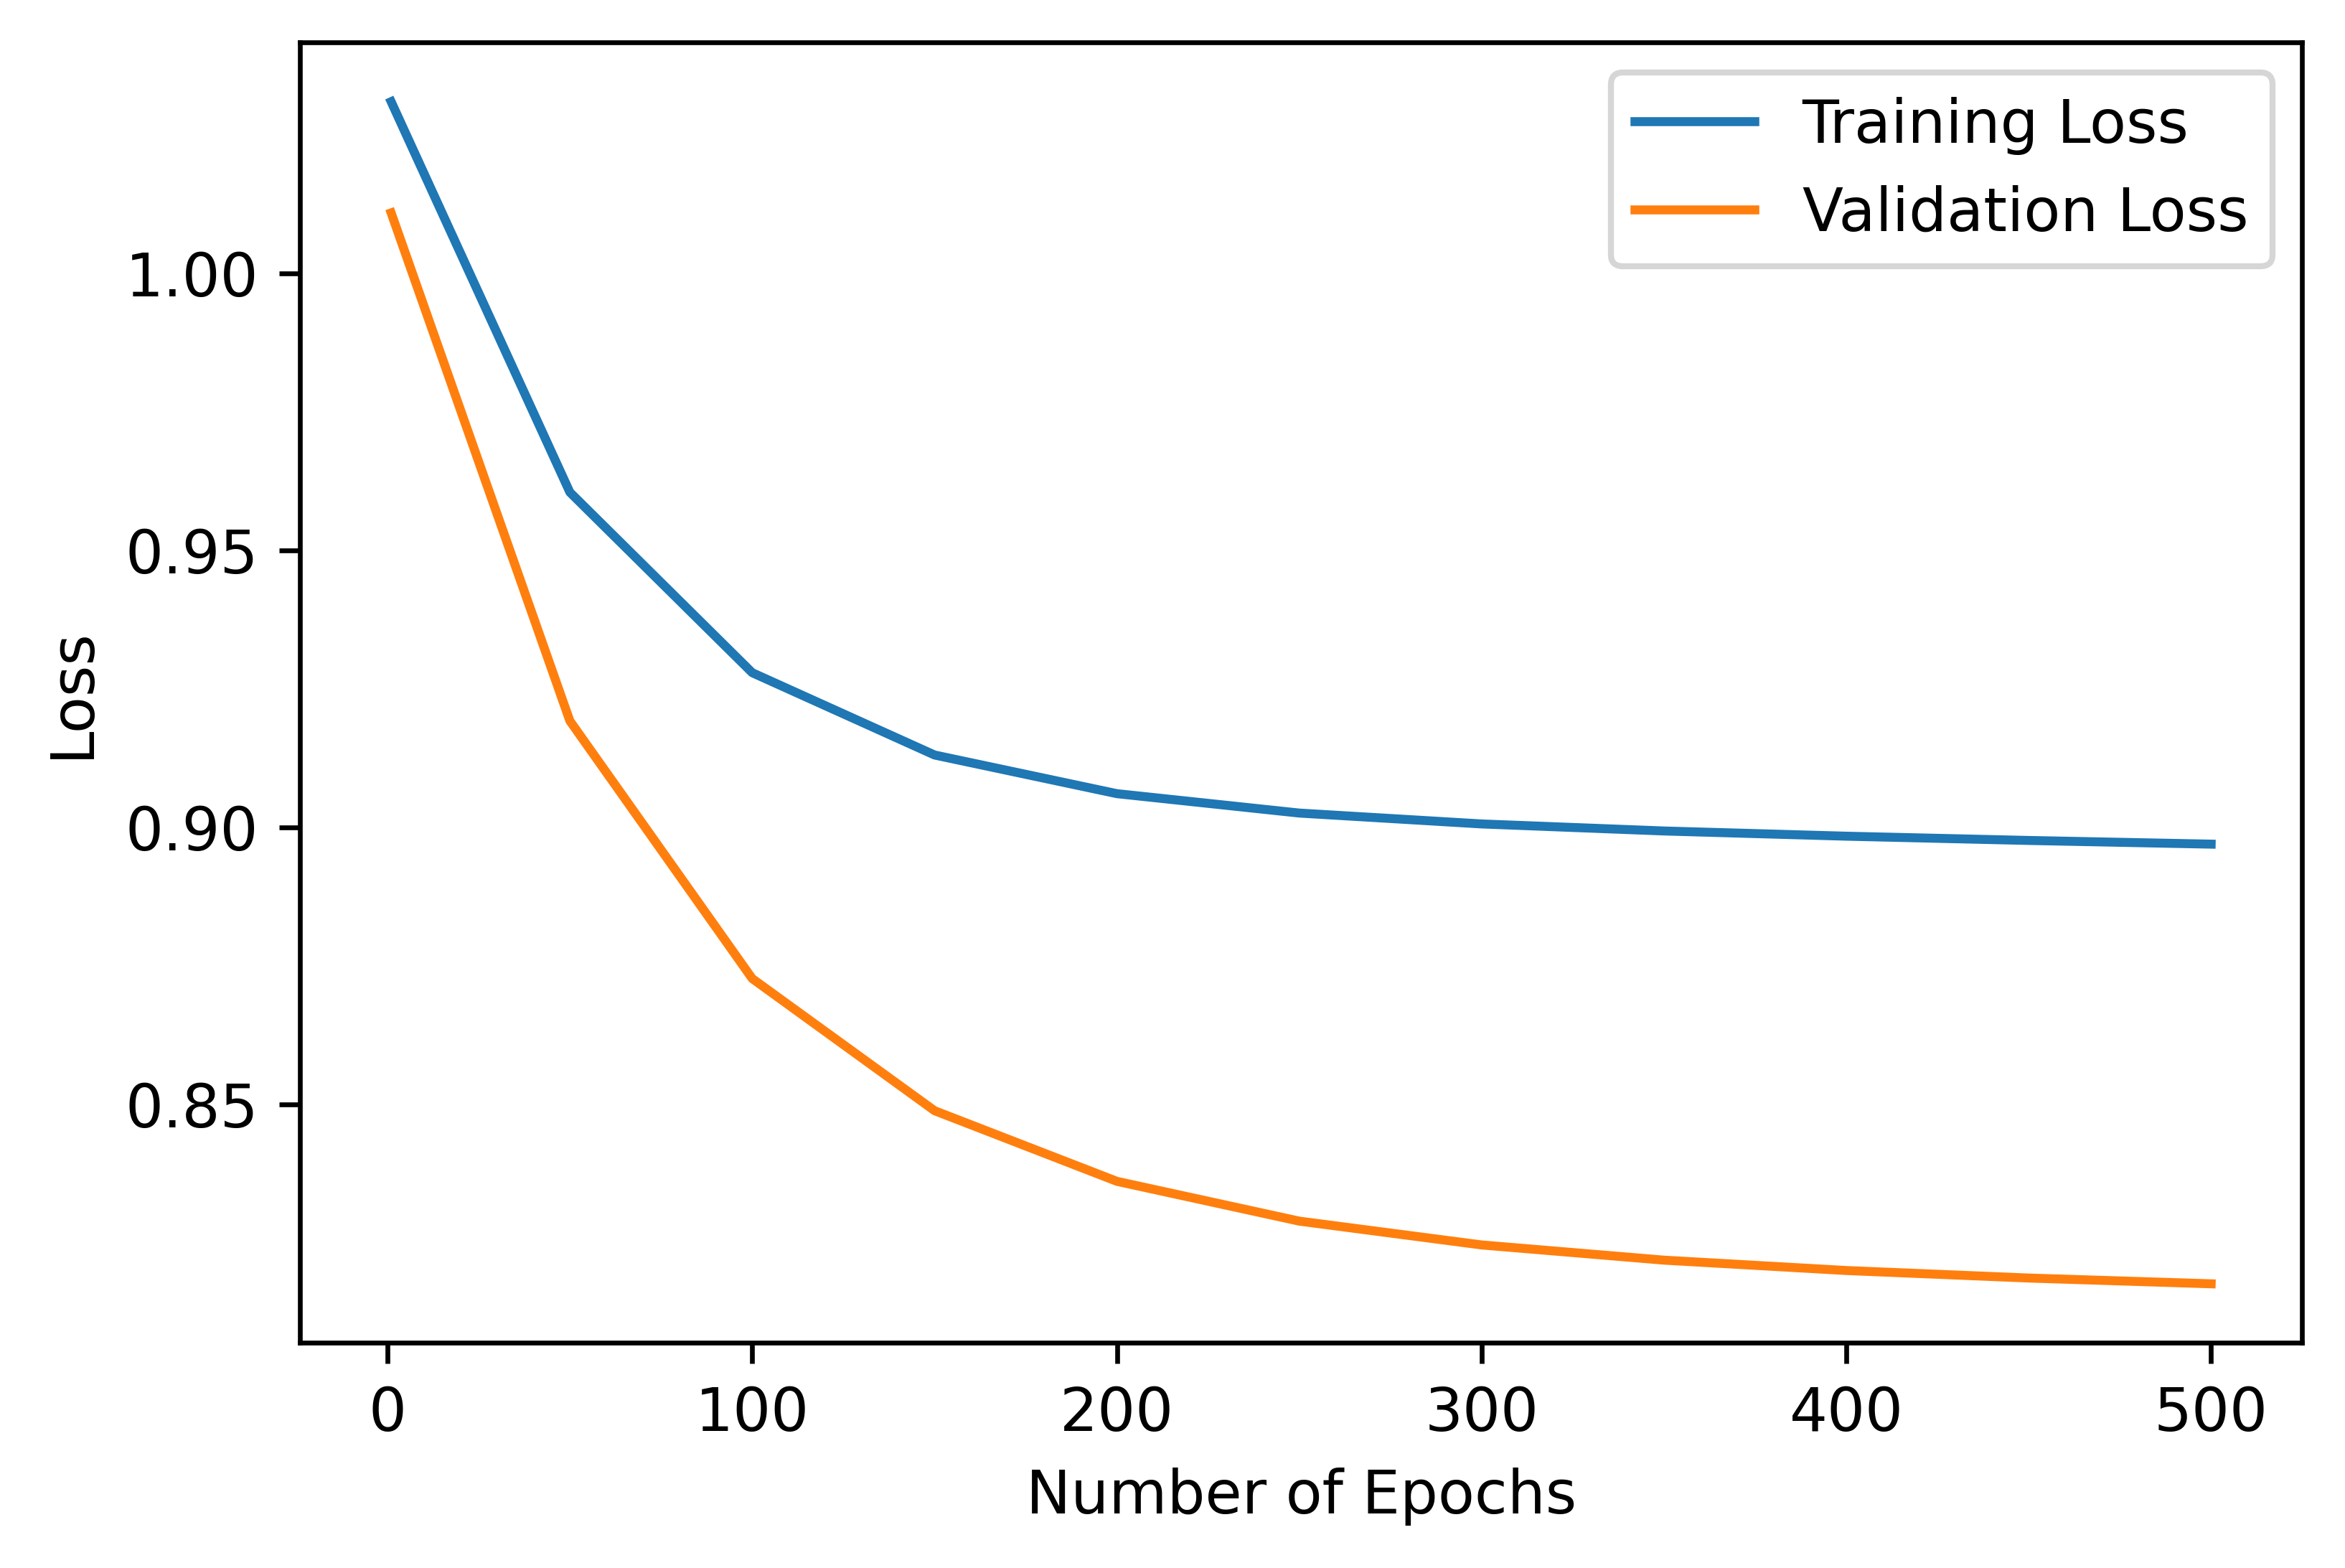

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(dpi=600)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.plot(epochs_list, loss_train_list, label="Training Loss")
plt.plot(epochs_list, loss_val_list, label="Validation Loss")
plt.legend()
plt.savefig("./loss_fun_3", format="png")

In [ ]:
# Reinitialize variables 
optimizer = None
seq_model = None
loss_train_list = []
loss_val_list = []
epochs_list = []

In [ ]:
# Neural Net of 5 hidden layers.
seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear_1', nn.Linear(6, 9)),
    ('hidden_activation_1', nn.Tanh()),
    ('hidden_linear_2', nn.Linear(9, 81)),
    ('hidden_activation_2', nn.Tanh()),
    ('hidden_linear_3', nn.Linear(81, 500)),
    ('hidden_activation_3', nn.Tanh()),
    ('hidden_linear_4', nn.Linear(500, 81)),
    ('hidden_activation_4', nn.Tanh()),
    ('hidden_linear_5', nn.Linear(81, 10)),
    ('hidden_activation_5', nn.Tanh()),
    ('output_linear', nn.Linear(10, 1))
]))

In [ ]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs = 1000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_cn_train,
    t_c_val = t_cn_val)
    
# Computing the Model Size
compute_model_size(seq_model)

Epoch 1, Training loss 1.0543, Validation loss 1.0463, Time(s) 0.89990
Epoch 50, Training loss 1.0214, Validation loss 1.0059, Time(s) 0.63265
Epoch 100, Training loss 0.9969, Validation loss 0.9747, Time(s) 0.61094
Epoch 150, Training loss 0.9781, Validation loss 0.9500, Time(s) 0.58980
Epoch 200, Training loss 0.9630, Validation loss 0.9296, Time(s) 0.58552
Epoch 250, Training loss 0.9506, Validation loss 0.9123, Time(s) 0.58154
Epoch 300, Training loss 0.9401, Validation loss 0.8974, Time(s) 0.58020
Epoch 350, Training loss 0.9313, Validation loss 0.8844, Time(s) 0.58115
Epoch 400, Training loss 0.9238, Validation loss 0.8731, Time(s) 0.57967
Epoch 450, Training loss 0.9174, Validation loss 0.8632, Time(s) 0.57899
Epoch 500, Training loss 0.9121, Validation loss 0.8546, Time(s) 0.57841
Epoch 550, Training loss 0.9076, Validation loss 0.8472, Time(s) 0.57661
Epoch 600, Training loss 0.9040, Validation loss 0.8409, Time(s) 0.57707
Epoch 650, Training loss 0.9010, Validation loss 0.835

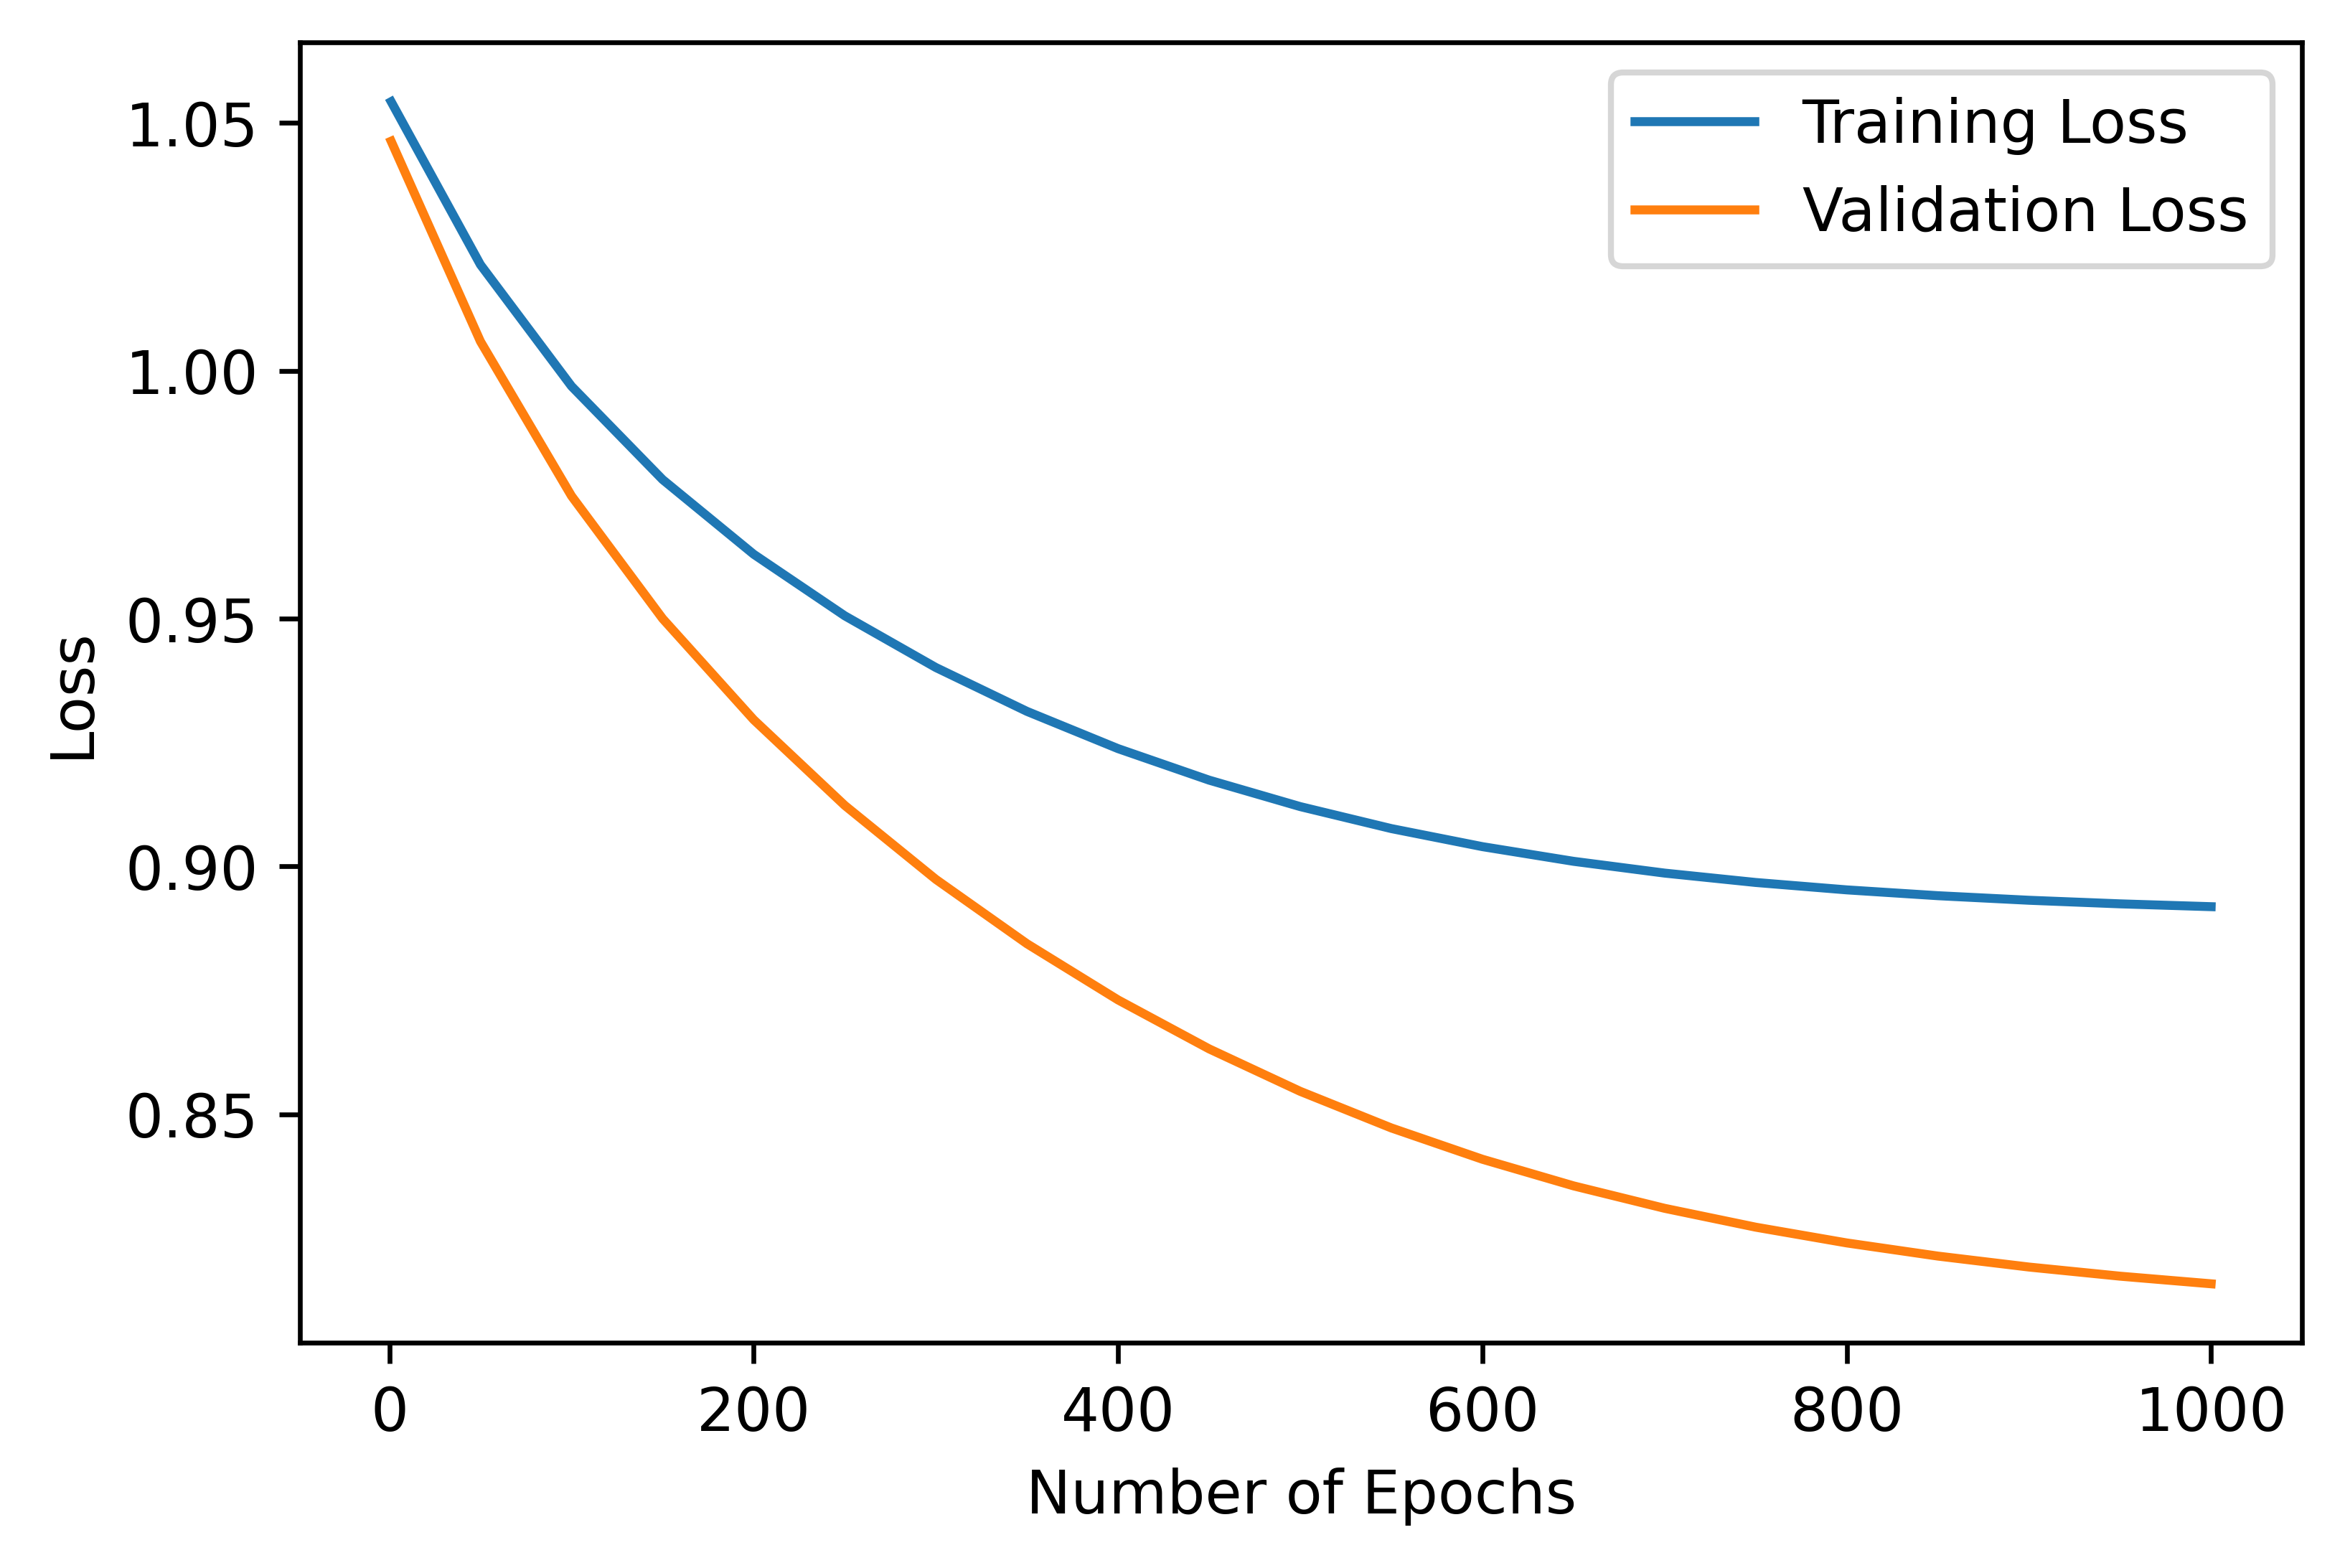

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(dpi=600)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.plot(epochs_list, loss_train_list, label="Training Loss")
plt.plot(epochs_list, loss_val_list, label="Validation Loss")
plt.legend()
plt.savefig("./loss_fun_5", format="png")

## Training a Time Series Model (LSTM)

In [ ]:
from torch.utils.data import Dataset

# source: //
class SequenceDataset(Dataset):
    def __init__(self, dataframe, target, features, sequence_length=6):
        self.features = features
        self.target = target
        self.sequence_length = sequence_length
        self.y = torch.tensor(dataframe[target].values).float()
        self.X = torch.tensor(dataframe[features].values).float()

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, i): 
        if i >= self.sequence_length - 1:
            i_start = i - self.sequence_length + 1
            x = self.X[i_start:(i + 1), :]
        else:
            padding = self.X[0].repeat(self.sequence_length - i - 1, 1)
            x = self.X[0:(i + 1), :]
            x = torch.cat((padding, x), 0)

        return x, self.y[i]

In [ ]:
from torch.utils.data import DataLoader

batch_size = 7
sequence_length = 24

# Filter dataset for features
target = "total load actual"
features = ["Average temperature in K", "Average pressure in hPa", \
           "Average humidity in %", "Average rain in last 1 hour in mm", \
           "Average rain in last 3 hours in mm", \
           "Average snow in last 3 hours in mm"]


train_dataset = SequenceDataset(
    df_train_data,
    target=target,
    features=features,
    sequence_length=sequence_length
)

val_dataset = SequenceDataset(
    df_val_data,
    target=target,
    features=features,
    sequence_length=sequence_length
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
X, y = next(iter(train_loader))

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: torch.Size([7, 24, 6])
Target shape: torch.Size([7])


In [ ]:
# Model
class ShallowRegressionLSTM(nn.Module):
    def __init__(self, num_features, hidden_units, num_layers):
        super().__init__()
        self.num_features = num_features  # this is the number of features
        self.hidden_units = hidden_units
        self.num_layers = num_layers

        self.lstm = nn.LSTM(
            input_size=num_features,
            hidden_size=hidden_units,
            batch_first=True,
            num_layers=self.num_layers
        )

        self.linear = nn.Linear(in_features=self.hidden_units, out_features=1)

    def forward(self, x):
        batch_size = x.shape[0]
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()
        
        _, (hn, _) = self.lstm(x, (h0, c0))
        out = self.linear(hn[0]).flatten() 

        return out

In [ ]:
# Training loop
def train_model(data_loader, model, loss_function, optimizer):
    num_batches = len(data_loader)
    total_loss = 0
    model.train()
    for X, y in data_loader:
      output = model(X)
      loss = loss_function(output, y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      total_loss += loss.item()
    avg_loss = total_loss / num_batches
    print(f"Training loss: {avg_loss}")

# Validation loop
def val_model(data_loader, model, loss_function):
    num_batches = len(data_loader)
    total_loss = 0
    model.eval()
    with torch.no_grad():
        for X, y in data_loader:
            output = model(X)
            total_loss += loss_function(output, y).item()

    avg_loss = total_loss / num_batches
    print(f"Validation loss: {avg_loss}")

# Generate prediction from the model
def predict(data_loader, model):
    output = torch.tensor([])
    model.eval()
    with torch.no_grad():
        for X, _ in data_loader:
            y_star = model(X)
            output = torch.cat((output, y_star), 0)
    return output

## Train model with 1 layer and 64 hidden units using Adam optimizer

In [ ]:
# Clear some parameters
model = None
optimizer = None

# Initialize
learning_rate = 1e-3
num_hidden_units = 64
num_layers = 1

# Instatitate model and optimizer
model = ShallowRegressionLSTM(num_features=len(features),
                              hidden_units=num_hidden_units, 
                              num_layers=num_layers)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [ ]:
print("Untrained test\n--------")
val_model(val_loader, model, loss_function)
print()

for epoch in range(10):
    print(f"Epoch {epoch}\n---------")
    train_model(train_loader, model, loss_function, optimizer=optimizer)
    val_model(val_loader, model, loss_function)
    print()

Untrained test
--------
Validation loss: 0.975026506430701

Epoch 0
---------
Training loss: 0.5994566495516785
Validation loss: 0.549477079070212

Epoch 1
---------
Training loss: 0.5420893769886196
Validation loss: 0.5575203241128812

Epoch 2
---------
Training loss: 0.5300019018262448
Validation loss: 0.5413458078296579

Epoch 3
---------
Training loss: 0.5175556667117798
Validation loss: 0.5243098087712975

Epoch 4
---------
Training loss: 0.508770339897058
Validation loss: 0.5225696529005274

Epoch 5
---------
Training loss: 0.5000762212721499
Validation loss: 0.5386564961426255

Epoch 6
---------
Training loss: 0.4919903346980937
Validation loss: 0.5262597809499636

Epoch 7
---------
Training loss: 0.48348404327217326
Validation loss: 0.5361741339625578

Epoch 8
---------
Training loss: 0.47313011542217004
Validation loss: 0.5457244955517517

Epoch 9
---------
Training loss: 0.4651157281755769
Validation loss: 0.5484452164677409



In [ ]:
train_eval_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

ystar_col = "Model forecast"
df_train_data[ystar_col] = predict(train_eval_loader, model).numpy()
df_val_data[ystar_col] = predict(val_loader, model).numpy()

df_out = pd.concat((df_train_data, df_val_data))[[target, ystar_col]]

for c in df_out.columns:
    df_out[[str(c)]] = (df_out[[str(c)]] * target_std) + target_mean

print(df_out)

<ipython-input-23-9fcad8162923>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_data[ystar_col] = predict(train_eval_loader, model).numpy()


                           total load actual  Model forecast
time                                                        
2015-01-01 00:00:00+01:00            25385.0    26093.267578
2015-01-01 01:00:00+01:00            24382.0    26103.744141
2015-01-01 02:00:00+01:00            22734.0    25961.410156
2015-01-01 03:00:00+01:00            21286.0    25891.283203
2015-01-01 04:00:00+01:00            20264.0    25885.935547
...                                      ...             ...
2018-12-31 19:00:00+01:00            30653.0    37651.667969
2018-12-31 20:00:00+01:00            29735.0    37526.847656
2018-12-31 21:00:00+01:00            28071.0    36275.457031
2018-12-31 22:00:00+01:00            25801.0    33534.742188
2018-12-31 23:00:00+01:00            24455.0    30741.968750

[38568 rows x 2 columns]


<ipython-input-23-9fcad8162923>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val_data[ystar_col] = predict(val_loader, model).numpy()


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

pio.templates.default = "plotly_white"

plot_template = dict(
    layout=go.Layout({
        "font_size": 18,
        "xaxis_title_font_size": 24,
        "yaxis_title_font_size": 24})
)

fig = px.line(df_out, labels=dict(time="Date", value="Electric Load in MWh"))
fig.add_vline(x="2018-03-20", line_width=4, line_dash="dash")
fig.add_annotation(xref="paper", x=0.75, yref="paper", y=0.8, text="Test set start", showarrow=False)
fig.update_layout(
    template=plot_template, legend=dict(orientation='h', y=1.02, title_text="")
)
fig.show()

## Train model with 3 layer and 64 hidden units using Adam optimizer

In [ ]:
# Clear some parameters
model = None
optimizer = None

# Initialize
learning_rate = 1e-3
num_hidden_units = 64
num_layers = 3

# Instatitate model and optimizer
model = ShallowRegressionLSTM(num_features=len(features),
                              hidden_units=num_hidden_units, 
                              num_layers=num_layers)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
print("Untrained test\n--------")
val_model(val_loader, model, loss_function)
print()

for epoch in range(10):
    print(f"Epoch {epoch}\n---------")
    train_model(train_loader, model, loss_function, optimizer=optimizer)
    val_model(val_loader, model, loss_function)
    print()

Untrained test
--------
Validation loss: 0.9653479862508589

Epoch 0
---------
Training loss: 0.6039443200867379
Validation loss: 0.5455177697394687

Epoch 1
---------
Training loss: 0.5457586135331561
Validation loss: 0.5362789949059729

Epoch 2
---------
Training loss: 0.5316422100044946
Validation loss: 0.5400836721078295

Epoch 3
---------
Training loss: 0.5207306900942282
Validation loss: 0.5896294244346183

Epoch 4
---------
Training loss: 0.5114668785229312
Validation loss: 0.5428635571872437

Epoch 5
---------
Training loss: 0.5000174666806454
Validation loss: 0.5355322378034283

Epoch 6
---------
Training loss: 0.49266925361937086
Validation loss: 0.5359439932216827

Epoch 7
---------
Training loss: 0.4835321187031558
Validation loss: 0.5377500087995515

Epoch 8
---------
Training loss: 0.4775006419720429
Validation loss: 0.528161423528878

Epoch 9
---------
Training loss: 0.4693123382599027
Validation loss: 0.561642084531224



In [ ]:
train_eval_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

ystar_col = "Model forecast"
df_train_data[ystar_col] = predict(train_eval_loader, model).numpy()
df_val_data[ystar_col] = predict(val_loader, model).numpy()

df_out = pd.concat((df_train_data, df_val_data))[[target, ystar_col]]

for c in df_out.columns:
    df_out[[str(c)]] = (df_out[[str(c)]] * target_std) + target_mean

print(df_out)

<ipython-input-27-9fcad8162923>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



                           total load actual  Model forecast
time                                                        
2015-01-01 00:00:00+01:00            25385.0    27015.675781
2015-01-01 01:00:00+01:00            24382.0    27027.285156
2015-01-01 02:00:00+01:00            22734.0    26871.699219
2015-01-01 03:00:00+01:00            21286.0    26815.232422
2015-01-01 04:00:00+01:00            20264.0    26782.451172
...                                      ...             ...
2018-12-31 19:00:00+01:00            30653.0    34717.250000
2018-12-31 20:00:00+01:00            29735.0    34713.875000
2018-12-31 21:00:00+01:00            28071.0    34285.042969
2018-12-31 22:00:00+01:00            25801.0    31972.666016
2018-12-31 23:00:00+01:00            24455.0    28760.164062

[38568 rows x 2 columns]


<ipython-input-27-9fcad8162923>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = px.line(df_out, labels=dict(time="Dates", value="Electric Load in MWh"))
fig.add_vline(x="2018-03-20", line_width=4, line_dash="dash")
fig.add_annotation(xref="paper", x=0.75, yref="paper", y=0.8, text="Test set start", showarrow=False)
fig.update_layout(
    template=plot_template, legend=dict(orientation='h', y=1.02, title_text="")
)
fig.show()

## Custom LSTM model